In [1]:

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Using TensorFlow backend.


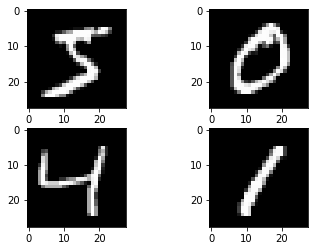

In [2]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [11]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

print(X_train.shape , y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [12]:

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [13]:

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [14]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [15]:
print(X_train.shape , y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [16]:

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2837 - accuracy: 0.9197 - val_loss: 0.1320 - val_accuracy: 0.9620
Epoch 2/10
 - 5s - loss: 0.1119 - accuracy: 0.9676 - val_loss: 0.0923 - val_accuracy: 0.9729
Epoch 3/10
 - 6s - loss: 0.0728 - accuracy: 0.9786 - val_loss: 0.0823 - val_accuracy: 0.9744
Epoch 4/10
 - 5s - loss: 0.0511 - accuracy: 0.9849 - val_loss: 0.0673 - val_accuracy: 0.9787
Epoch 5/10
 - 5s - loss: 0.0364 - accuracy: 0.9896 - val_loss: 0.0655 - val_accuracy: 0.9801
Epoch 6/10
 - 5s - loss: 0.0272 - accuracy: 0.9928 - val_loss: 0.0652 - val_accuracy: 0.9786
Epoch 7/10
 - 5s - loss: 0.0197 - accuracy: 0.9950 - val_loss: 0.0567 - val_accuracy: 0.9815
Epoch 8/10
 - 5s - loss: 0.0138 - accuracy: 0.9970 - val_loss: 0.0602 - val_accuracy: 0.9809
Epoch 9/10
 - 5s - loss: 0.0104 - accuracy: 0.9979 - val_loss: 0.0619 - val_accuracy: 0.9805
Epoch 10/10
 - 5s - loss: 0.0084 - accuracy: 0.9984 - val_loss: 0.0665 - val_accuracy: 0.9802
Baseline Error: 1.9

In [17]:
# Simple CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
model.save('final_model.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 442us/step - loss: 0.2498 - accuracy: 0.9290 - val_loss: 0.0811 - val_accuracy: 0.9752
Epoch 2/10
60000/60000 [==============================] - 26s 433us/step - loss: 0.0738 - accuracy: 0.9775 - val_loss: 0.0478 - val_accuracy: 0.9849
Epoch 3/10
60000/60000 [==============================] - 26s 434us/step - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0462 - val_accuracy: 0.9842
Epoch 4/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0362 - val_accuracy: 0.9879
Epoch 5/10
60000/60000 [==============================] - 26s 433us/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.0381 - val_accuracy: 0.9877
Epoch 6/10
60000/60000 [==============================] - 27s 454us/step - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0326 - val_accuracy: 0.9894
Epoch 7/10
60000/60000 [==============================] 

C:\Users\Jonathan\Anaconda6\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


7


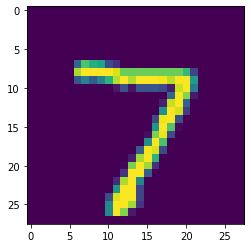

In [39]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

import matplotlib.pyplot as plt


def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	plt.imshow(img)
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

def run_example():
	# load the image
	imgx = load_image('C:\\Users\\Jonathan\\computer vision\\mnist\\sample_image.png')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	digit = model.predict_classes(imgx)
	print(digit[0])
 
# entry point, run the example
run_example()